<a href="https://colab.research.google.com/github/CP4-IOT/CP4_AnaliseDeDados/blob/main/CP4__IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do Dataset Individual Household Electric Power Consumption

Este notebook contém as respostas para as questões do CP 01 de IoT sobre Análise de Dados de Consumidores de Energia.

In [ ]:
# 1. Carregue o dataset e exiba as 10 primeiras linhas.
# Bibliotecas necessárias
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = "household_power_consumption.txt"
df = pd.read_csv(filename, sep=';', low_memory=False)

# Mostrar as 10 primeiras linhas
df.head(10)


Saving household_power_consumption.txt to household_power_consumption (2).txt


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


## 2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

- **Global_active_power:** energia ativa consumida pela residência, efetivamente usada para realizar trabalho (aparelhos elétricos, iluminação).
- **Global_reactive_power:** energia reativa, usada para manter campos eletromagnéticos em equipamentos, sem realizar trabalho útil diretamente.


## 3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [ ]:
# 3. Verifique se existem valores ausentes no dataset. Quantifique-os.
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)


Valores ausentes por coluna:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


## 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.

In [ ]:
# 4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana correspondente.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['DayOfWeek'] = df['Date'].dt.day_name()
print(df.head(3))


        Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3 DayOfWeek  
0           18.400          0.000          1.000            17.0  Saturday  
1           23.000          0.000          1.000            16.0  Saturday  
2           23.000          0.000          2.000            17.0  Saturday  


## 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [ ]:
# 5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
mean_daily_power_2007 = df_2007.groupby('Date')['Global_active_power'].mean()
print(mean_daily_power_2007.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


## 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

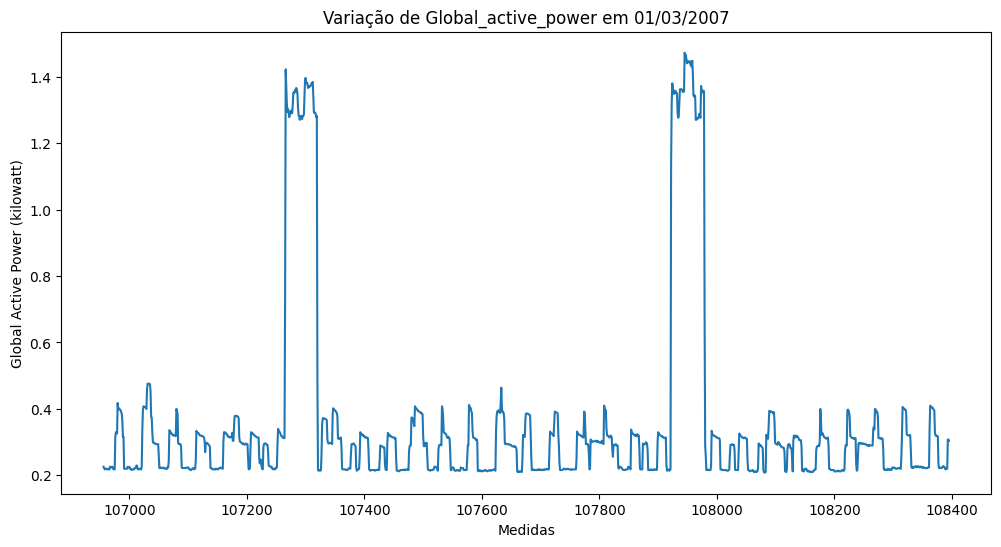

In [ ]:
# 6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.
import matplotlib.pyplot as plt

# Variação de Global_active_power em 01/03/2007
single_day = df[df['Date'] == '2007-03-01']

plt.figure(figsize=(12,6))
plt.plot(single_day['Global_active_power'])
plt.title('Variação de Global_active_power em 01/03/2007')
plt.xlabel('Medidas')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


## 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?

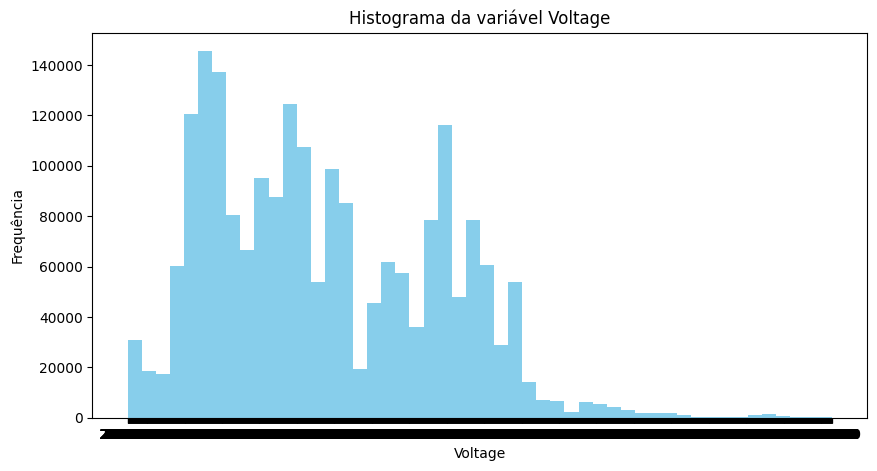

In [ ]:
# 7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?
plt.figure(figsize=(10,5))
plt.hist(df['Voltage'].dropna(), bins=50, color='skyblue')
plt.title('Histograma da variável Voltage')
plt.xlabel('Voltage')
plt.ylabel('Frequência')
plt.show()

#O histograma da variável Voltage mostra que a maioria das medições está concentrada em torno de um valor central,
# com uma distribuição que aparenta ser aproximadamente simétrica, indicando pouca variação extrema.

## 8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [ ]:
# 8. Calcule o consumo médio por mês em todo o período disponível no dataset.
df['MonthYear'] = df['Date'].dt.to_period('M')
mean_monthly_power = df.groupby('MonthYear')['Global_active_power'].mean()
print(mean_monthly_power.head())


MonthYear
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
Freq: M, Name: Global_active_power, dtype: float64


## 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [ ]:
# 9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).
daily_power = df.groupby('Date')['Global_active_power'].sum()
max_power_day = daily_power.idxmax()
max_power_value = daily_power.max()
print(f'Dia com maior consumo: {max_power_day}, Consumo: {max_power_value}')


Dia com maior consumo: 2006-12-23 00:00:00, Consumo: 4773.386


## 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [ ]:
# 10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
mean_weekday_power = df[df['IsWeekend'] == False]['Global_active_power'].mean()
mean_weekend_power = df[df['IsWeekend'] == True]['Global_active_power'].mean()

print(f'Consumo médio dias de semana: {mean_weekday_power}')
print(f'Consumo médio finais de semana: {mean_weekend_power}')


Consumo médio dias de semana: 1.0354720516747498
Consumo médio finais de semana: 1.2342321767913047


## 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [ ]:
# 11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
correlation = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
display(correlation)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


## 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.

In [ ]:
# 12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1, Sub_metering_2 e Sub_metering_3.
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['Total_Sub_metering'] = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum(axis=1)
print(df.head(3))


        Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3 DayOfWeek  \
0              18.4             0.0             1.0            17.0  Saturday   
1              23.0             0.0             1.0            16.0  Saturday   
2              23.0             0.0             2.0            17.0  Saturday   

  MonthYear  IsWeekend  Total_Sub_metering  
0   2006-12       True                18.0  
1   2006-12       True                17.0  
2   2006-12       True                19.0  


## 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.

In [ ]:
# 13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de Global_active_power.
monthly_sub_metering = df.groupby(df['Date'].dt.to_period('M'))['Total_Sub_metering'].mean()
monthly_global_active = df.groupby(df['Date'].dt.to_period('M'))['Global_active_power'].mean()

months_exceeding = monthly_sub_metering[monthly_sub_metering > monthly_global_active]
print(months_exceeding)


Date
2006-12    10.871204
2007-01    10.423051
2007-02     9.485665
2007-03    10.212634
2007-04     6.249954
2007-05     8.452442
2007-06     7.371806
2007-07     5.681004
2007-08     6.975896
2007-09     8.205856
2007-10     8.674104
2007-11     9.818958
2007-12    11.636290
2008-01     9.785999
2008-02     8.447222
2008-03     9.454682
2008-04     9.574745
2008-05     9.019064
2008-06     9.775000
2008-07     7.145094
2008-08     2.370116
2008-09     8.825185
2008-10     8.584409
2008-11     9.133542
2008-12     8.779391
2009-01    10.690166
2009-02     9.770536
2009-03     9.896259
2009-04     9.605255
2009-05     9.066241
2009-06     7.433611
2009-07     5.571013
2009-08     5.920789
2009-09     9.127153
2009-10     9.766174
2009-11    10.403866
2009-12    11.093190
2010-01    11.343369
2010-02    12.762202
2010-03     9.415614
2010-04     9.508403
2010-05    10.419086
2010-06     9.730463
2010-07     5.486962
2010-08     4.472917
2010-09     7.574861
2010-10     9.500179
2010-11 

##14. Faça um gráfico de série temporal do Voltage para o ano de 2008.




In [7]:
# 14. Série temporal de Voltage para 2008
import matplotlib.pyplot as plt

df_2008 = df[df['Date'].dt.year == 2008].copy()
# Se existir coluna 'Time' no dataset, combine para timestamp completo:
if 'Time' in df.columns:
    df_2008['DateTime'] = pd.to_datetime(df_2008['Date'].astype(str) + ' ' + df_2008['Time'])
    x = 'DateTime'
else:
    x = 'Date'  # fallback

df_2008['Voltage'] = pd.to_numeric(df_2008['Voltage'], errors='coerce')

plt.figure(figsize=(14,5))
plt.plot(df_2008[x], df_2008['Voltage'], linewidth=0.6)
plt.title('Série temporal do Voltage (2008)')
plt.xlabel('Tempo')
plt.ylabel('Voltage (V)')
plt.tight_layout()
plt.show()


KeyError: 'Voltage'

<Figure size 1400x500 with 0 Axes>

##15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).


In [ ]:
# 15. Comparar consumo entre verão e inverno (hemisfério norte)
df['Month'] = df['Date'].dt.month
verao = df['Month'].isin([6,7,8])
inverno = df['Month'].isin([12,1,2])

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

media_verao = df.loc[verao, 'Global_active_power'].mean()
media_inverno = df.loc[inverno, 'Global_active_power'].mean()

print(f'Média Global_active_power - Verão (JJA): {media_verao:.4f}')
print(f'Média Global_active_power - Inverno (DJF): {media_inverno:.4f}')


##16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

In [ ]:
# 16. Amostragem 1% e comparação de distribuição
import numpy as np

amostra = df.sample(frac=0.01, random_state=42)
full = pd.to_numeric(df['Global_active_power'], errors='coerce').dropna()
sampled = pd.to_numeric(amostra['Global_active_power'], errors='coerce').dropna()

print('Estatísticas - Base completa:',
      f'n={len(full)}, média={full.mean():.4f}, desvio={full.std():.4f}, P50={full.median():.4f}')
print('Estatísticas - Amostra 1% :',
      f'n={len(sampled)}, média={sampled.mean():.4f}, desvio={sampled.std():.4f}, P50={sampled.median():.4f}')

# Opcional: histogramas sobrepostos
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(full, bins=50, alpha=0.5, label='Completa', density=True)
plt.hist(sampled, bins=50, alpha=0.5, label='Amostra 1%', density=True)
plt.legend(); plt.title('Distribuição Global_active_power: completa vs amostra 1%')
plt.xlabel('Global_active_power'); plt.ylabel('Densidade')
plt.show()


##17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [ ]:
# 17. Min-Max Scaling nas variáveis numéricas principais
from sklearn.preprocessing import MinMaxScaler

cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
        'Sub_metering_1','Sub_metering_2','Sub_metering_3']
for c in cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[cols])
df_minmax = df.copy()
df_minmax[[f'{c}_minmax' for c in cols]] = scaled

df_minmax[[f'{c}_minmax' for c in cols]].head()


##18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [ ]:
# 18. K-means em consumo diário
from sklearn.cluster import KMeans

daily = df.groupby('Date').agg({
    'Global_active_power':'mean',
    'Global_reactive_power':'mean',
    'Voltage':'mean',
    'Global_intensity':'mean',
    'Sub_metering_1':'sum',
    'Sub_metering_2':'sum',
    'Sub_metering_3':'sum'
}).dropna()

# Normalizar features para clustering
scaler_km = MinMaxScaler()
daily_scaled = scaler_km.fit_transform(daily)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(daily_scaled)
daily_clusters = daily.copy()
daily_clusters['cluster'] = clusters

# Resumo interpretativo: médias por cluster
cluster_profile = daily_clusters.groupby('cluster').mean()
display(cluster_profile)

# Dica de interpretação:
# - Cluster com maior média de Global_active_power e sub_meterings indica dias de maior consumo geral.
# - Cluster com alta Global_reactive_power/Intensity pode refletir mais carga indutiva (motores, etc.).


##19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

In [ ]:
# 19. Decomposição (tendência, sazonalidade, resíduo) em 6 meses
from statsmodels.tsa.seasonal import seasonal_decompose

daily_mean = df.groupby('Date')['Global_active_power'].mean().dropna()
daily_mean = daily_mean.asfreq('D')  # frequência diária

# recorte de 6 meses (ex.: 2007-01 a 2007-06, ajuste se necessário)
six_months = daily_mean.loc['2007-01-01':'2007-06-30'].dropna()

result = seasonal_decompose(six_months, model='additive', period=7)  # sazonalidade semanal
fig = result.plot()
fig.set_size_inches(12,8)


##20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.


In [ ]:
# 20. Regressão linear simples
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = df[['Global_intensity','Global_active_power']].dropna()
X = data[['Global_intensity']]
y = data['Global_active_power']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = model.score(X_test, y_test)

print(f'Coeficiente (slope): {model.coef_:.4f}')
print(f'Intercepto: {model.intercept_:.4f}')
print(f'MAE: {mae:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}')


##21. Séries temporais por hora - Converta Date e Time em índice datetime. - Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power. - Identifique os horários de maior consumo médio ao longo do dia.

In [ ]:
# 21. Índice datetime, reamostragem por hora e horários de maior consumo médio
import pandas as pd

# Garantir numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Criar índice datetime combinando Date e Time (se existir a coluna Time)
if 'Time' in df.columns:
    df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
else:
    # fallback: usar somente Date no início do dia
    df['DateTime'] = pd.to_datetime(df['Date'])

df = df.set_index('DateTime').sort_index()

# Reamostrar por hora (média horária)
gap_hourly = df['Global_active_power'].resample('1H').mean()

# Consumo médio por hora do dia (0..23) para identificar horários de pico médio
avg_by_hour = gap_hourly.groupby(gap_hourly.index.hour).mean().sort_values(ascending=False)
print('Top 5 horários de maior consumo médio (hora do dia 0-23):')
print(avg_by_hour.head(5))


##22. Autocorrelação do consumo - Use a série temporal de Global_active_power. - Calcule a autocorrelação em lags de 1h, 24h e 48h. - Pergunta: existem padrões repetidos diariamente?

In [ ]:
# 22. Autocorrelações em lags de 1h, 24h e 48h
import numpy as np

# Série horária já calculada: gap_hourly
s = gap_hourly.dropna()

def autocorr(series, lag):
    return series.autocorr(lag=lag)

ac_1h = autocorr(s, 1)
ac_24h = autocorr(s, 24)
ac_48h = autocorr(s, 48)

print(f'Autocorrelação 1h:  {ac_1h:.3f}')
print(f'Autocorrelação 24h: {ac_24h:.3f}')
print(f'Autocorrelação 48h: {ac_48h:.3f}')

# Interpretação sugerida:
# Valores positivos e próximos de 1 em 24h indicam padrão diário repetido.


##23. Redução de dimensionalidade com PCA - Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity. - Aplique PCA para reduzir para 2 componentes principais. - Analise a variância explicada por cada component

In [ ]:
# 23. PCA com 4 variáveis para 2 componentes
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity']
for c in features:
    df[c] = pd.to_numeric(df[c], errors='coerce')

X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

explained = pca.explained_variance_ratio_
print(f'Variância explicada PC1: {explained:.3f}')
print(f'Variância explicada PC2: {explained[1]:.3f}')
print(f'Variância total explicada: {explained.sum():.3f}')


##24. Visualização de clusters no espaço PCA - Combine os resultados do PCA com K-Means (3 clusters). - Plote os pontos resultantes e pinte cada grupo por cluster. - Pergunta: os grupos se separam de forma cla

In [ ]:
# 24. Visualizar K-Means (3 clusters) nos 2 PCs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(7,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=8, alpha=0.6)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('Clusters no espaço PCA (3 grupos)')
plt.show()

# Observação para análise:
# - Separação clara: nuvens bem distintas com pouca sobreposição.
# - Sobreposição forte sugere que os grupos não se distinguem apenas por essas 4 variáveis.


##25. Regressão polinomial vs linear - Modele Global_active_power em função de Voltage. - Compare Regressão Linear Simples com Regressão Polinomial (grau 2). - Analise RMSE e a curva ajustada

In [ ]:
# 25. Comparar Linear vs Polinomial (grau 2)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

data = df[['Voltage','Global_active_power']].dropna()
X = data[['Voltage']].values
y = data['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear
lin = LinearRegression().fit(X_train, y_train)
pred_lin = lin.predict(X_test)
rmse_lin = mean_squared_error(y_test, pred_lin, squared=False)

# Polinomial grau 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_p = poly.fit_transform(X_train)
X_test_p  = poly.transform(X_test)

lin_p = LinearRegression().fit(X_train_p, y_train)
pred_poly = lin_p.predict(X_test_p)
rmse_poly = mean_squared_error(y_test, pred_poly, squared=False)

print(f'RMSE Linear: {rmse_lin:.4f}')
print(f'RMSE Polinomial (grau 2): {rmse_poly:.4f}')

# Curvas ajustadas (amostra para plotar)
xs = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
ys_lin = lin.predict(xs)
ys_poly = lin_p.predict(poly.transform(xs))

plt.figure(figsize=(7,5))
plt.scatter(X_test, y_test, s=8, alpha=0.4, label='Dados (teste)')
plt.plot(xs, ys_lin, color='red', label='Linear')
plt.plot(xs, ys_poly, color='green', label='Polinomial grau 2')
plt.xlabel('Voltage'); plt.ylabel('Global_active_power')
plt.title('Linear vs Polinomial (grau 2)')
plt.legend(); plt.show()

# Interpretação:
# - Modelo com menor RMSE tem melhor ajuste.
# - Se a relação apresentar curvatura, é comum o polinomial grau 2 reduzir o erro em comparação ao linear.


##26. Carregamento e inspeção inicial
 - Carregue o dataset no Pandas.
 - Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [3]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = "energydata_complete.csv"
df = pd.read_csv(filename, low_memory=False)

# Exibir tipos de dados e informações gerais do DataFrame
df.info()

# Exibir estatísticas descritivas das colunas numéricas
df.describe()


Saving energydata_complete.csv to energydata_complete (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-nul

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


##27. Distribuição do consumo
 - Crie histogramas e séries temporais para a variável Appliances.
 - Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

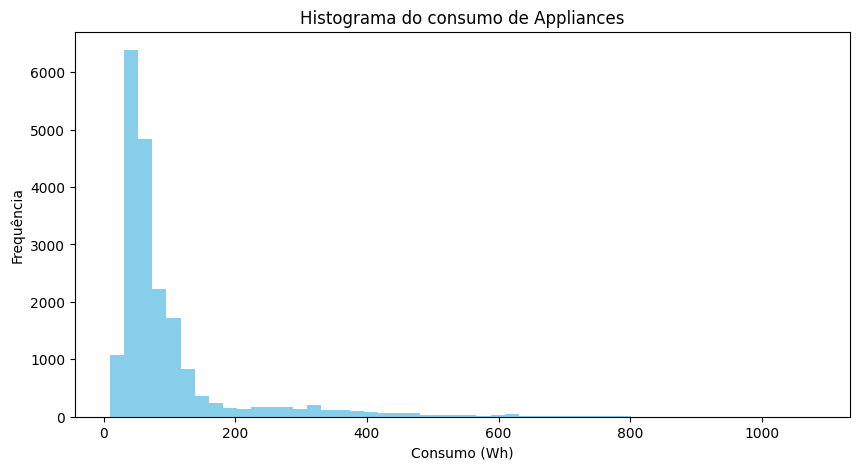

/tmp/ipython-input-548403656.py:20: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  appliances_resampled = df.set_index('date')['Appliances'].resample('H').mean()


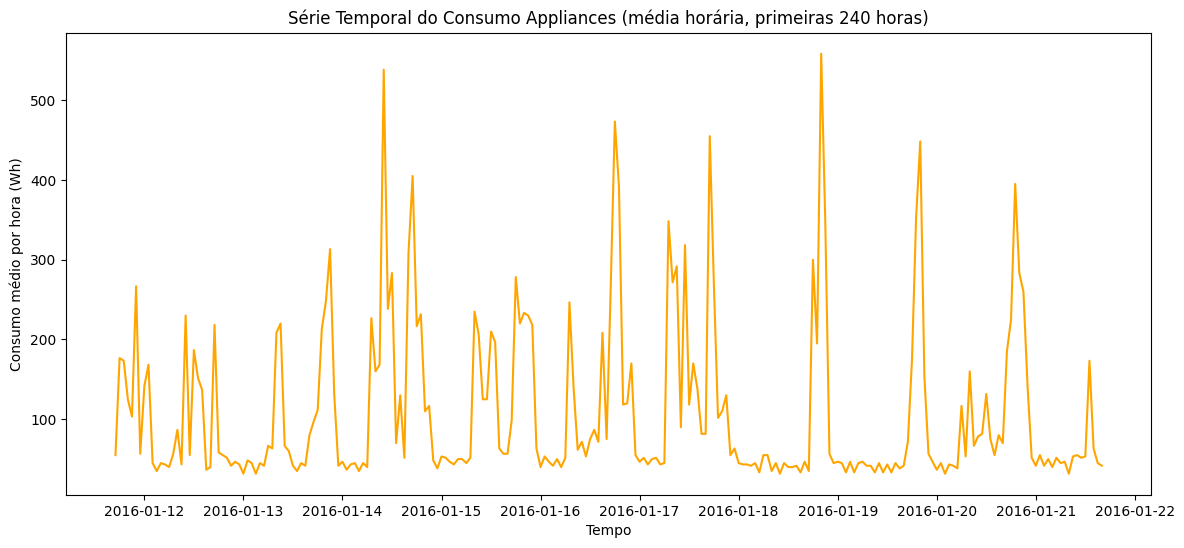

In [5]:
# 27. Distribuição do consumo - Histogramas e séries temporais para 'Appliances'
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna 'date' para datetime (se ainda não feito)
df['date'] = pd.to_datetime(df['date'])

# Converter 'Appliances' para numérico (se necessário)
df['Appliances'] = pd.to_numeric(df['Appliances'], errors='coerce')

# HISTOGRAMA
plt.figure(figsize=(10,5))
plt.hist(df['Appliances'].dropna(), bins=50, color='skyblue')
plt.title('Histograma do consumo de Appliances')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.show()

# SÉRIE TEMPORAL - reamostrar para média horária para facilitar leitura
appliances_resampled = df.set_index('date')['Appliances'].resample('H').mean()

plt.figure(figsize=(14,6))
plt.plot(appliances_resampled.iloc[:240], color='orange')
plt.title('Série Temporal do Consumo Appliances (média horária, primeiras 240 horas)')
plt.xlabel('Tempo')
plt.ylabel('Consumo médio por hora (Wh)')
plt.show()
